<a href="https://colab.research.google.com/github/dhanushreesoni/deeplearning/blob/master/cloudClassification.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
from keras.models import Sequential,load_model
from keras.layers import Conv3D, MaxPooling2D, Dropout, Dense, Flatten
from keras.utils import np_utils

Using TensorFlow backend.


In [1]:
%tensorflow_version 1.x

TensorFlow 1.x selected.


In [3]:
import tensorflow
tensorflow.__version__

'1.15.2'

In [7]:
#mounting colab to the drive 
from google.colab import drive
drive.mount('/content/drive')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&response_type=code&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly

Enter your authorization code:
··········
Mounted at /content/drive


In [0]:
import os,cv2
import numpy as np
import matplotlib.pyplot as plt
import theano
from PIL import Image
from sklearn.utils import shuffle
from sklearn.model_selection import train_test_split

In [0]:
path = '/content/drive/My Drive/Projects/data'

In [0]:
listing = os.listdir(path)

In [0]:
listing.sort()

In [11]:
listing

['A_100img.png',
 'A_101img.png',
 'A_102img.png',
 'A_103img.png',
 'A_104img.png',
 'A_105img.png',
 'A_106img.png',
 'A_107img.png',
 'A_108img.png',
 'A_109img.png',
 'A_10img.png',
 'A_110img.png',
 'A_111img.png',
 'A_112img.png',
 'A_113img.png',
 'A_114img.png',
 'A_115img.png',
 'A_116img.png',
 'A_117img.png',
 'A_118img.png',
 'A_119img.png',
 'A_11img.png',
 'A_120img.png',
 'A_121img.png',
 'A_122img.png',
 'A_123img.png',
 'A_124img.png',
 'A_125img.png',
 'A_126img.png',
 'A_127img.png',
 'A_128img.png',
 'A_129img.png',
 'A_12img.png',
 'A_130img.png',
 'A_131img.png',
 'A_132img.png',
 'A_133img.png',
 'A_134img.png',
 'A_135img.png',
 'A_136img.png',
 'A_137img.png',
 'A_138img.png',
 'A_139img.png',
 'A_13img.png',
 'A_140img.png',
 'A_141img.png',
 'A_142img.png',
 'A_143img.png',
 'A_144img.png',
 'A_145img.png',
 'A_146img.png',
 'A_147img.png',
 'A_148img.png',
 'A_149img.png',
 'A_14img.png',
 'A_150img.png',
 'A_151img.png',
 'A_152img.png',
 'A_153img.png',
 '

In [0]:
img_rows,img_cols,img_layer = 280, 280, 3
test  = []
for file in listing:
    im = Image.open(path + '/' +file)
    im = np.array(im)
    test.append(im)
    #img = im.resize((img_rows,img_cols, img_layer))
    #gray = img.convert('L')
    #img.save(path2 + '/' + file, 'png')
test = np.array(test)

In [0]:
imlist = os.listdir(path)

In [13]:
test.shape

(784, 125, 125, 3)

In [0]:
num_of_samples = 784
labels = np.ones((num_of_samples,),dtype='int64')

In [0]:
labels[0:224]=0  #168
labels[224:313]=1 #168:342
labels[313:564]=2  #342:504
labels[564:699]=3  #504:765
labels[699:784]=4  #765:918


In [0]:
data, Label = shuffle(test,labels,random_state=2)

In [0]:
X_train, X_test, Y_train, Y_test = train_test_split(data, Label, test_size=0.2, random_state=4)

In [18]:
X_train.shape, X_test.shape, Y_train.shape, Y_test.shape

((627, 125, 125, 3), (157, 125, 125, 3), (627,), (157,))

In [0]:
X_train = X_train.astype('float32')
X_train /= 255.
X_test = X_test.astype('float32')
X_test /= 255.


In [0]:
print("X_train.shape:",X_train.shape)
print("y_train.shape:",Y_train.shape)
print("X_test.shape:",X_test.shape)
print("y_test.shape:",Y_test.shape)
X_train[0]

X_train.shape: (627, 125, 125, 3)
y_train.shape: (627,)
X_test.shape: (157, 125, 125, 3)
y_test.shape: (157,)


In [20]:
Y_train[0:11]

array([2, 3, 2, 2, 4, 0, 0, 4, 2, 4, 0])

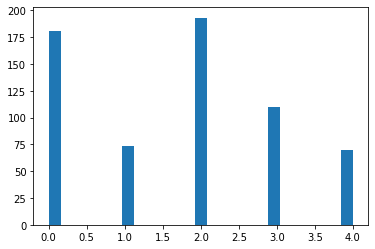

In [21]:
import matplotlib.pyplot as plt

x = list(Y_train)
plt.hist(x, bins = 25)
plt.show()

In [0]:
#reshape input data
X_train = X_train.reshape(X_train.shape[0], 125, 125, 3)
X_test = X_test.reshape(X_test.shape[0], 125, 125, 3)

In [51]:
type(X_train)

numpy.ndarray

In [23]:
X_test.shape

(157, 125, 125, 3)

In [0]:
# one hot encode outputs
y_train = np_utils.to_categorical(Y_train)
y_test = np_utils.to_categorical(Y_test)

In [25]:
y_train[0:11]

array([[0., 0., 1., 0., 0.],
       [0., 0., 0., 1., 0.],
       [0., 0., 1., 0., 0.],
       [0., 0., 1., 0., 0.],
       [0., 0., 0., 0., 1.],
       [1., 0., 0., 0., 0.],
       [1., 0., 0., 0., 0.],
       [0., 0., 0., 0., 1.],
       [0., 0., 1., 0., 0.],
       [0., 0., 0., 0., 1.],
       [1., 0., 0., 0., 0.]], dtype=float32)

In [26]:
y_test.shape

(157, 5)

In [0]:
num_classes = y_test.shape[1]
labels=range(y_test.shape[1])

In [28]:
from keras.layers.convolutional import Conv2D

model = Sequential()
#1................
model.add(Conv2D(32, (11, 11), input_shape=(125, 125, 3), activation='relu'))

model.add(MaxPooling2D(pool_size=(3, 3)))
#2...............
model.add(Conv2D(32,
    (5, 5),
    activation='relu'))
model.add(MaxPooling2D(pool_size=(3, 3)))
#3.................
model.add(Conv2D(32,
    (3, 3),
    activation='relu'))
model.add(Conv2D(32,
    (3, 3),
    activation='relu'))
model.add(MaxPooling2D(pool_size=(3, 3)))
model.add(Flatten())
model.add(Dropout(0.25))
#model.add(Dense(64, activation='relu'))
model.add(Dense(64, activation='relu'))
#model.add(Dense(64, activation='relu'))
#model.add(Dropout(0.2))
model.add(Dense(num_classes, activation='softmax'))







Instructions for updating:
Please use `rate` instead of `keep_prob`. Rate should be set to `rate = 1 - keep_prob`.


In [29]:
model.compile(loss='categorical_crossentropy', optimizer='rmsprop',
                metrics=['accuracy'])

In [30]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_1 (Conv2D)            (None, 115, 115, 32)      11648     
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 38, 38, 32)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 34, 34, 32)        25632     
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 11, 11, 32)        0         
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 9, 9, 32)          9248      
_________________________________________________________________
conv2d_4 (Conv2D)            (None, 7, 7, 32)          9248      
_________________________________________________________________
max_pooling2d_3 (MaxPooling2 (None, 2, 2, 32)         

In [0]:
model.fit(X_train, y_train, validation_data=(X_test, y_test),
        epochs=100)


Train on 627 samples, validate on 157 samples
Epoch 1/100
627/627 [==============================] - 12s 19ms/step - loss: 1.5748 - accuracy: 0.4003 - val_loss: 1.3721 - val_accuracy: 0.4586
Epoch 2/100
627/627 [==============================] - 12s 19ms/step - loss: 1.3149 - accuracy: 0.5439 - val_loss: 1.1355 - val_accuracy: 0.6242
Epoch 3/100
627/627 [==============================] - 12s 19ms/step - loss: 1.0747 - accuracy: 0.5805 - val_loss: 0.9214 - val_accuracy: 0.6752
Epoch 4/100
627/627 [==============================] - 11s 18ms/step - loss: 1.0676 - accuracy: 0.6061 - val_loss: 1.3348 - val_accuracy: 0.4904
Epoch 5/100
627/627 [==============================] - 11s 18ms/step - loss: 1.0030 - accuracy: 0.6188 - val_loss: 0.9084 - val_accuracy: 0.6752
Epoch 6/100
627/627 [==============================] - 12s 18ms/step - loss: 1.0787 - accuracy: 0.6061 - val_loss: 0.7270 - val_accuracy: 0.7070
Epoch 7/100
627/627 [==============================] - 12s 19ms/step - loss: 0.9233

627/627 [==============================] - 12s 18ms/step - loss: 0.3681 - accuracy: 0.8533 - val_loss: 0.2797 - val_accuracy: 0.8854
Epoch 56/100
627/627 [==============================] - 12s 18ms/step - loss: 0.3309 - accuracy: 0.8756 - val_loss: 0.1811 - val_accuracy: 0.9427
Epoch 57/100
627/627 [==============================] - 12s 19ms/step - loss: 0.5732 - accuracy: 0.8740 - val_loss: 0.2213 - val_accuracy: 0.9045
Epoch 58/100
627/627 [==============================] - 12s 19ms/step - loss: 0.2385 - accuracy: 0.9075 - val_loss: 0.2917 - val_accuracy: 0.8662
Epoch 59/100
627/627 [==============================] - 12s 18ms/step - loss: 0.3820 - accuracy: 0.8485 - val_loss: 1.7971 - val_accuracy: 0.5541
Epoch 60/100
627/627 [==============================] - 12s 18ms/step - loss: 0.3699 - accuracy: 0.8756 - val_loss: 1.6663 - val_accuracy: 0.7325
Epoch 61/100
627/627 [==============================] - 11s 18ms/step - loss: 0.5000 - accuracy: 0.8581 - val_loss: 0.1833 - val_accuracy

In [0]:
model.save("model_test1.h5")

In [0]:
model_json = model.to_json()
with open("model.json", "w") as json_file:
    json_file.write(model_json)

In [0]:
from sklearn.metrics import classification_report,confusion_matrix
import itertools


In [0]:
model_filepath = '/content/drive/My Drive/Projects/model_test1.h5'
model = load_model(
    model_filepath,
    custom_objects=None,
    compile=False)

In [33]:
X_test[0].shape

(125, 125, 3)

In [0]:
y_pred=[]
for img in X_test:
    pred_val=model.predict(img.reshape(1,125, 125, 3))
    pred_val=np.where(pred_val[0]== max(pred_val[0]))
    y_pred.append(pred_val[0][0])

In [36]:
y_pred=np.array(y_pred)
y_pred

array([0, 3, 2, 3, 3, 2, 2, 0, 0, 2, 2, 0, 0, 1, 4, 0, 0, 3, 2, 2, 0, 4,
       2, 2, 0, 1, 2, 0, 0, 3, 0, 0, 2, 0, 2, 2, 1, 0, 0, 2, 0, 3, 2, 0,
       2, 2, 2, 2, 4, 4, 0, 0, 0, 3, 2, 2, 2, 4, 1, 2, 2, 0, 2, 2, 3, 2,
       4, 2, 2, 0, 3, 0, 4, 0, 4, 0, 2, 2, 2, 2, 2, 0, 3, 2, 2, 3, 2, 2,
       2, 2, 3, 2, 2, 3, 4, 0, 2, 1, 2, 1, 0, 0, 3, 1, 0, 2, 2, 4, 4, 3,
       0, 0, 2, 3, 3, 3, 3, 2, 3, 3, 1, 0, 0, 3, 1, 3, 3, 1, 1, 4, 2, 2,
       2, 1, 0, 0, 1, 2, 2, 0, 2, 0, 0, 0, 1, 2, 2, 0, 4, 2, 2, 0, 0, 3,
       2, 1, 1])

In [37]:
Y_test

array([0, 3, 2, 3, 3, 2, 2, 0, 0, 2, 2, 0, 0, 4, 4, 0, 0, 3, 2, 2, 0, 4,
       2, 2, 0, 4, 2, 0, 0, 3, 0, 4, 2, 0, 2, 2, 1, 0, 0, 2, 0, 3, 2, 0,
       2, 2, 2, 2, 4, 4, 0, 0, 0, 4, 2, 2, 2, 4, 1, 2, 2, 0, 2, 2, 3, 2,
       4, 2, 2, 0, 3, 0, 4, 0, 1, 0, 3, 2, 2, 2, 2, 0, 3, 2, 2, 3, 2, 2,
       2, 2, 3, 2, 2, 3, 4, 0, 2, 1, 2, 1, 0, 0, 3, 1, 0, 2, 2, 1, 4, 3,
       0, 0, 2, 3, 3, 3, 3, 2, 3, 3, 1, 0, 0, 3, 1, 3, 3, 1, 1, 4, 2, 2,
       2, 1, 0, 0, 1, 2, 2, 0, 2, 0, 0, 0, 1, 2, 2, 0, 1, 2, 2, 0, 0, 3,
       2, 4, 1])

In [39]:
from sklearn.metrics import classification_report,confusion_matrix
print(confusion_matrix(np.argmax(y_test,axis=1), y_pred))


[[43  0  0  0  0]
 [ 0 13  0  0  3]
 [ 0  0 58  0  0]
 [ 0  0  1 24  0]
 [ 1  3  0  1 10]]


In [61]:
from keras.preprocessing.image import load_img
from keras.preprocessing.image import img_to_array
target_names = ['Sky', 'Pattern', 'Thich Dark','Thick White','Veil']
test_image = '/content/drive/My Drive/Projects/data/D_7img.png'
img = load_img(test_image, target_size=(125, 125, 1))
img = img_to_array(img)
img = img.reshape(1, 125, 125, 3)
print((model.predict(img)))
print(model.predict_classes(img))
print(target_names[model.predict_classes(img)[0]])

[[0. 0. 0. 1. 0.]]
[3]
Thick White


ERROR! Session/line number was not unique in database. History logging moved to new session 69
Confusion matrix, without normalization
[[43  0  0  0  0]
 [ 0 13  0  0  3]
 [ 0  0 58  0  0]
 [ 0  0  1 24  0]
 [ 1  3  0  1 10]]


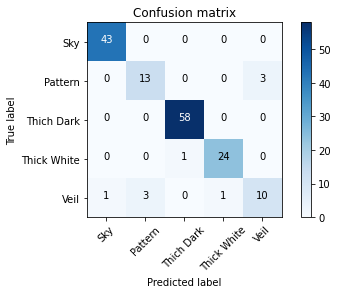

<Figure size 2160x720 with 0 Axes>

<Figure size 432x288 with 0 Axes>

In [46]:
from itertools import product
target_names = ['Sky', 'Pattern', 'Thich Dark','Thick White','Veil']
def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')

    print(cm)

    thresh = cm.max() / 2.
    for i, j in product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, cm[i, j],
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')

# Compute confusion matrix
cnf_matrix = (confusion_matrix(np.argmax(y_test,axis=1), y_pred))

np.set_printoptions(precision=2)

plt.figure()

# Plot non-normalized confusion matrix
plot_confusion_matrix(cnf_matrix, classes=target_names,
                      title='Confusion matrix')
plt.figure(figsize=(30,10))
# Plot normalized confusion matrix
#plot_confusion_matrix(cnf_matrix, classes=target_names, normalize=True,
#                      title='Normalized confusion matrix')
plt.figure()
plt.show()

In [71]:
from tkinter import *
from tkinter import ttk
from tkinter import filedialog
from PIL import Image, ImageTk


class Root(Tk):
    def __init__(self):
        super(Root, self).__init__()
        self.title("Python Tkinter Dialog Widget")
        self.minsize(640, 400)

        self.labelFrame = ttk.LabelFrame(self, text = "Open File")
        self.labelFrame.grid(column = 0, row = 1, padx = 20, pady = 20)

        self.button()


    def button(self):
        self.button = ttk.Button(self.labelFrame, text = "Browse A File",command = self.fileDialog)
        self.button.grid(column = 1, row = 1)


    def fileDialog(self):

        self.filename = filedialog.askopenfilename(initialdir =  "/", title = "Select A File", filetype =
        (("jpeg files","*.jpg"),("all files","*.*")) )
        self.label = ttk.Label(self.labelFrame, text = "")
        self.label.grid(column = 1, row = 2)
        self.label.configure(text = self.filename)

        img = Image.open(self.filename)
        photo = ImageTk.PhotoImage(img)

        self.label2 = Label(image=photo)
        self.label2.image = photo 
        self.label2.grid(column=3, row=4)

root = Root()
root.mainloop()

TclError: ignored

In [74]:
from google.colab import files
uploaded = files.upload()

Saving 0001.png to 0001.png


In [83]:
for key in uploaded:
    print (key)

0001.png
ERROR! Session/line number was not unique in database. History logging moved to new session 73


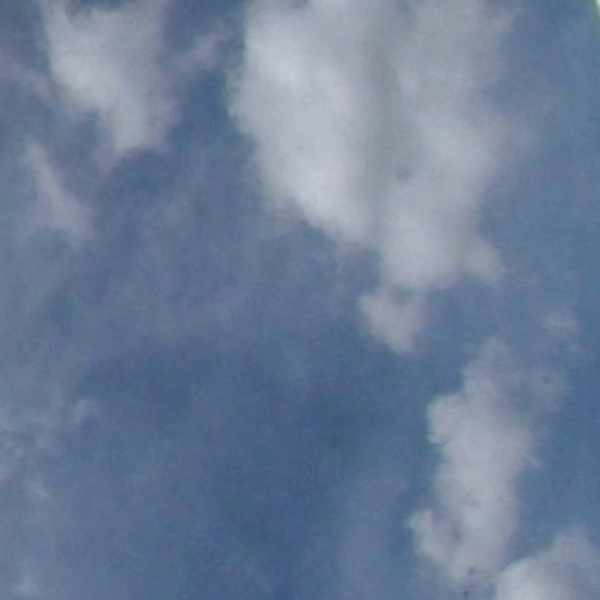

In [90]:
from IPython.display import Image
Image('0001.png', width = 200)